<a href="https://colab.research.google.com/github/mingzeng0226/NeuroFlow-Task/blob/master/Subjective_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setting up environment in Google Colab

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)
!pwd
os.chdir('gdrive/My Drive/NeuroFlow_Project')
!pwd
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/NeuroFlow_Project
 Draft.gdoc  'Subjective Metrics.ipynb'   subj_measures.csv


# 2. Data Import and Preparation

In [4]:
sm = pd.read_csv('subj_measures.csv')
sm.head()

,date,user_id,type,value
0,2019-06-08T23:19:34.418Z,2348,mood,2.76
1,2019-06-13T16:33:34.399Z,5232,sleep,2.44
2,2018-12-26T14:24:00.436Z,4209,sleep,1.88
3,2019-07-17T20:11:23.792Z,2802,mood,2.20
4,2019-05-09T17:27:50.900Z,2025,mood,4.00


In [5]:
# Check the missing value--> No missing value found in the dataset
null_percent = (sm.isnull().sum()/sm.isnull().count()).sort_values(ascending=False)
print(null_percent)

value      0.0
type       0.0
user_id    0.0
date       0.0
dtype: float64


# 3. Analyze and Visualize Progress

Aim: visualize the portfolio of the four meatrics for each patient.



  

*   step 1 randomly select a patient;
*   step 2 find the four matrics for the patient for the time he/she put a measurement;
*   step 3 impute the missing values by the mode in each column;
*   step 4 plot the matrics for the patient.

Therefore, we can use the same method to visualize the data for each patient in our dataset.














In [7]:
# To see how many patients in our dataset
print ("There are total {} partients in the dataset".format(sm['user_id'].nunique()))

There are total 100 partients in the dataset


In [0]:
sm["type"].value_counts()

sleep                 3415
mood                  3397
anticipatoryStress     332
ruminationStress       316
Name: type, dtype: int64

In [8]:
# we randomly select a partient in my dataset, so that we can use his/her measurements to see the progress
Pat_rand = np.random.choice(sm['user_id'].unique())
print(" The chosen patient is {}. ".format(Pat_rand) )

 The chosen patient is 1366. 


In [9]:
Pat_pd = sm[sm.user_id==Pat_rand]
Pat_pd.head()

,date,user_id,type,value
302,2018-10-11T15:29:54.151Z,1366,mood,3.160000
459,2019-07-11T14:49:18.917Z,1366,sleep,2.440000
646,2019-02-02T22:47:05.128Z,1366,mood,3.562578
690,2019-06-11T20:39:57.848Z,1366,sleep,0.320000
1238,2019-07-24T12:30:53.531Z,1366,sleep,2.000000


In [10]:
Pat_pd_temp= Pat_pd.pivot_table(index='date', columns='type', values='value').reset_index()
Pat_pd_temp.head()

type,date,anticipatoryStress,mood,ruminationStress,sleep
0,2018-09-18T23:16:55.531Z,NaN,4.00,NaN,NaN
1,2018-09-19T14:25:10.044Z,NaN,0.04,NaN,NaN
2,2018-09-19T14:25:21.773Z,NaN,NaN,NaN,3.0
3,2018-09-25T02:18:58.850Z,3.2,NaN,NaN,NaN
4,2018-09-25T21:53:55.268Z,NaN,NaN,NaN,1.0


In [0]:
# Converting the current time format into date and time
import dateutil.parser
Pat_pd_temp['Date'] = Pat_pd_temp['date'].apply(lambda x: dateutil.parser.parse(x).strftime('%m/%d/%Y'))
Pat_pd_temp['Time'] = Pat_pd_temp['date'].apply(lambda x: dateutil.parser.parse(x).strftime('%H:%M:%S'))

In [12]:
Pat_pd_temp.head()

type,date,anticipatoryStress,mood,ruminationStress,sleep,Date,Time
0,2018-09-18T23:16:55.531Z,NaN,4.00,NaN,NaN,09/18/2018,23:16:55
1,2018-09-19T14:25:10.044Z,NaN,0.04,NaN,NaN,09/19/2018,14:25:10
2,2018-09-19T14:25:21.773Z,NaN,NaN,NaN,3.0,09/19/2018,14:25:21
3,2018-09-25T02:18:58.850Z,3.2,NaN,NaN,NaN,09/25/2018,02:18:58
4,2018-09-25T21:53:55.268Z,NaN,NaN,NaN,1.0,09/25/2018,21:53:55


In [13]:
# May be some deplicates in "Date"
print("Duplicate Rows except first occurrence based on all columns are :{}".format(Pat_pd_temp[Pat_pd_temp.duplicated(['Date'])]))

Duplicate Rows except first occurrence based on all columns are :type                      date  anticipatoryStress  ...        Date      Time
2     2018-09-19T14:25:21.773Z                 NaN  ...  09/19/2018  14:25:21
4     2018-09-25T21:53:55.268Z                 NaN  ...  09/25/2018  21:53:55
8     2018-10-16T20:40:10.644Z                 NaN  ...  10/16/2018  20:40:10
17    2019-01-09T18:17:19.441Z                1.64  ...  01/09/2019  18:17:19
27    2019-03-12T12:53:40.889Z                 NaN  ...  03/12/2019  12:53:40
51    2019-06-30T12:09:40.862Z                 NaN  ...  06/30/2019  12:09:40
56    2019-07-15T21:30:29.419Z                 NaN  ...  07/15/2019  21:30:29
59    2019-07-18T14:20:19.030Z                 NaN  ...  07/18/2019  14:20:19

[8 rows x 7 columns]


In [14]:
#  if the most of the values in duplicated data are Null, then we drop the duplicated data will not have significant impact on our analysis
Pat_pd_temp.drop_duplicates(subset='Date',inplace=True)
Pat_pd_temp.sort_values(by = 'Date').head()

type,date,anticipatoryStress,mood,ruminationStress,sleep,Date,Time
16,2019-01-09T05:44:59.253Z,NaN,NaN,NaN,0.68,01/09/2019,05:44:59
18,2019-02-01T13:11:00.599Z,NaN,NaN,NaN,2.64,02/01/2019,13:11:00
19,2019-02-02T22:47:05.128Z,NaN,3.562578,NaN,NaN,02/02/2019,22:47:05
20,2019-02-04T18:27:28.818Z,NaN,NaN,2.4,NaN,02/04/2019,18:27:28
21,2019-02-08T13:43:31.507Z,NaN,3.407202,NaN,NaN,02/08/2019,13:43:31


In [0]:
# find how many null value in each column
Pat_pd_temp.isnull().sum()
# impute the null value by the mode in each column
mode_na=Pat_pd_temp.filter(["anticipatoryStress", "mood","sleep","ruminationStress"]).mode()
Pat_pd_temp[["anticipatoryStress", "mood","sleep","ruminationStress"]]=Pat_pd_temp[["anticipatoryStress", "mood","sleep","ruminationStress"]].fillna(value=mode_na.iloc[0])

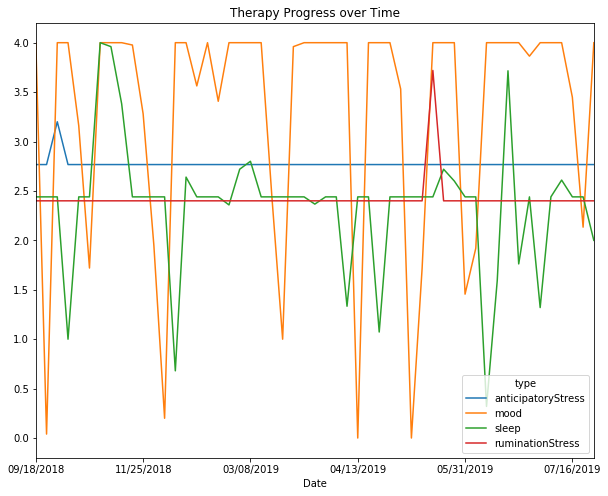

In [16]:
# it is possible that the "ruminationStress" or "anticipatoryStress"is not in the graph. Because only 316 records of ruminationStress and
# 332 record in "anticipatoryStress".
Pat_pd_temp.plot(x="Date", y=["anticipatoryStress", "mood","sleep","ruminationStress"],figsize=(10,8),title="Therapy Progress over Time")

##############################################################################################

Cognitive behavioral therapy (CBT) includes behavioral changes (such as keeping a regular bedtime and wake up time, getting out of bed after being awake for 20 minutes or so, and eliminating afternoon naps) but it adds a cognitive or "thinking" component. CBT works to challenge unhealthy beliefs and fears around sleep and teach rational, positive thinking. There is a good amount of research supporting the use of CBT for insomnia. For example, in one study, patients with insomnia attended one CBT session via the internet per week for **6 weeks**. After the treatment, these people had improved sleep quality.

Reference: https://www.sleepfoundation.org/insomnia/treatment


---


We resampled the data with the frequency is 42 days
(6 week) in order to see the progress of every course of the therapy.

In [17]:
Pat_pd_temp['Date'] = pd.to_datetime(Pat_pd_temp['Date'])
Pat_pd_temp1 = Pat_pd_temp.set_index('Date')
Pat_pd_temp1.head()

type,date,anticipatoryStress,mood,ruminationStress,sleep,Time
Date,,,,,,
2018-09-18,2018-09-18T23:16:55.531Z,2.766936,4.00,2.4,2.44,23:16:55
2018-09-19,2018-09-19T14:25:10.044Z,2.766936,0.04,2.4,2.44,14:25:10
2018-09-25,2018-09-25T02:18:58.850Z,3.200000,4.00,2.4,2.44,02:18:58
2018-10-06,2018-10-06T03:54:47.564Z,2.766936,4.00,2.4,1.00,03:54:47
2018-10-11,2018-10-11T15:29:54.151Z,2.766936,3.16,2.4,2.44,15:29:54


In [18]:
data_resampled = Pat_pd_temp1.resample('42D').mean()
data_resampled.head()

type,anticipatoryStress,mood,ruminationStress,sleep
Date,,,,
2018-09-18,2.839113,2.820000,2.4,2.200000
2018-10-30,2.766936,3.851273,2.4,3.244206
2018-12-11,2.766936,2.049867,2.4,1.853333
2019-01-22,2.766936,3.828297,2.4,2.506452
2019-03-05,2.766936,3.218182,2.4,2.365471


In [19]:
# impute the null value by the mode in each column
data_resampled_na=data_resampled.filter(["anticipatoryStress", "mood","sleep","ruminationStress"]).mode()
data_resampled[["anticipatoryStress", "mood","sleep","ruminationStress"]]=data_resampled[["anticipatoryStress", "mood","sleep","ruminationStress"]].fillna(value=data_resampled_na.iloc[0])
data_resampled.head()

type,anticipatoryStress,mood,ruminationStress,sleep
Date,,,,
2018-09-18,2.839113,2.820000,2.4,2.200000
2018-10-30,2.766936,3.851273,2.4,3.244206
2018-12-11,2.766936,2.049867,2.4,1.853333
2019-01-22,2.766936,3.828297,2.4,2.506452
2019-03-05,2.766936,3.218182,2.4,2.365471


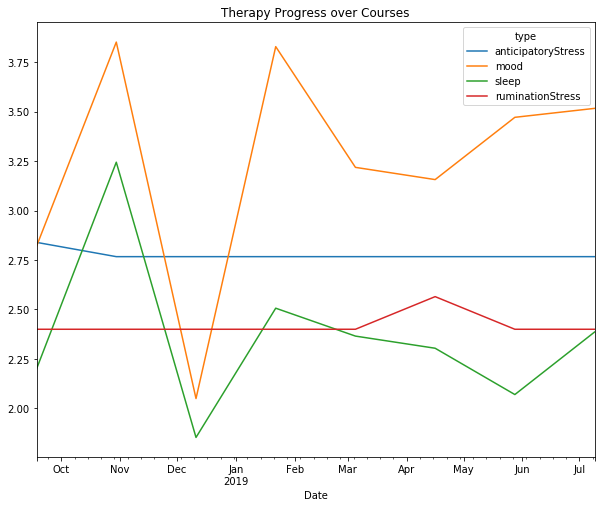

In [20]:
data_resampled.plot(y=["anticipatoryStress", "mood","sleep","ruminationStress"],use_index=True,figsize=(10,8),title="Therapy Progress over Courses")

For this patients, because the record for "ruminationStress" and "anticipatoryStress" is very limited, all missing values have been imputed by the mode, the plot of these two features are almost straight. 


##########################################################################################

# Check the Seasonailty of Mood and Sleep

As the days grow shorter and sunlight exposure becomes scarcer, seasonal affective disorder (SAD) becomes more common. SAD is a type of depression that occurs during the late fall and early winter and often ends by spring or early summer. 

reference: https://www.health.harvard.edu/mind-and-mood/shining-a-light-on-winter-depression

We can see that the scores of mood and sleep experienced  a dramatically decrease in November and December. I want to examine whether this change is mainly caused by SAD or it is a real reflection of the patient.

<Figure size 432x288 with 0 Axes>

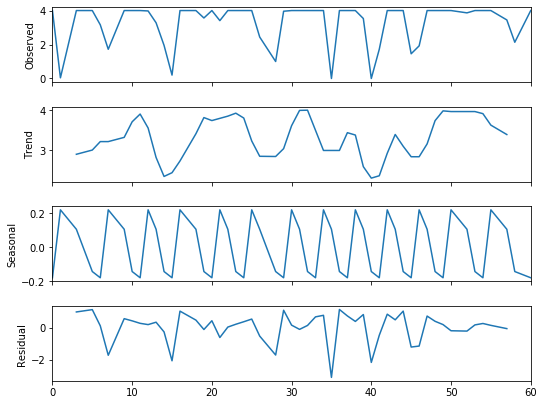

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Pat_pd_temp['mood'], freq = 4)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(8, 6)

<Figure size 432x288 with 0 Axes>

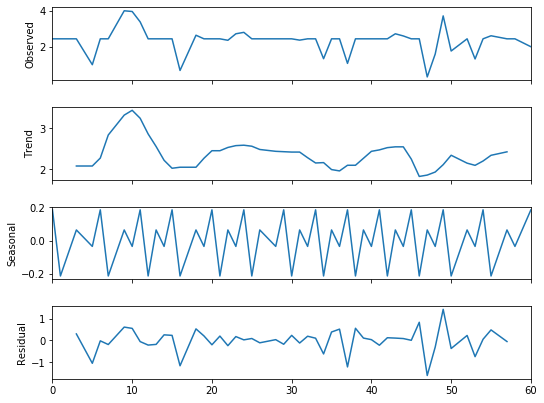

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Pat_pd_temp['sleep'], freq=4)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(8, 6)

There are some seasonality in the sleep and mode. Therefore, when we want to visualize the progress, we need to rule out the seasonality.

###########################################################################################

# Check the Correlation for the entire dataset

In [21]:
sm_temp = sm.pivot_table(index='date', columns='type', values='value')
sm_temp.corr()

type,anticipatoryStress,mood,ruminationStress,sleep
type,,,,
anticipatoryStress,1.000000,-0.197735,-0.501365,-0.022452
mood,-0.197735,1.000000,-0.205882,-0.011066
ruminationStress,-0.501365,-0.205882,1.000000,-0.048487
sleep,-0.022452,-0.011066,-0.048487,1.000000


Sleep is negative correlated with the other factors. The ruminationStress has the maximal negative relationship with sleep.